# Simages Demo

- [Getting Started](#getting_started)
- [Numpy Array](#numpy_array)
- [Image Folder](#image_folder)
  - Find similar images ([Beaches](#beaches))
  - Find duplicates ([Balloons](#balloons))
  - Find `n` closest pairs ([EmbeddingExtractor](#extractor))

<a id='getting_started'></a>
## Getting Started

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

import simages
from simages import find_duplicates

<a id='numpy_arrays'></a>
## Numpy Arrays

If your data is already in numpy arrays, otherwise, skip to [Image Folder](#image_folder)

INFO:simages.extractor:Note: No GPU found, using CPU. Performance is improved on a CUDA-device.


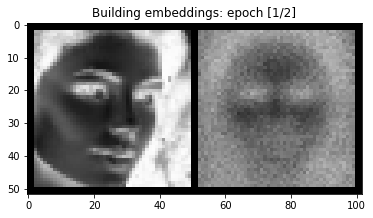

INFO:simages.extractor:epoch [1/2], loss:0.0430


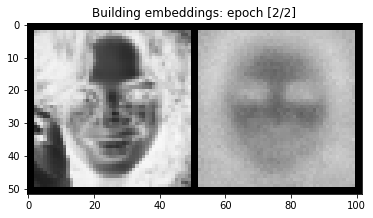

INFO:simages.extractor:epoch [2/2], loss:0.0383


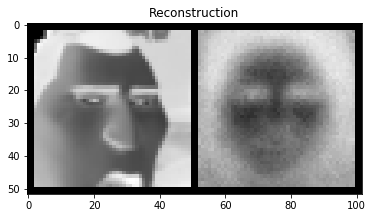

INFO:simages.extractor:eval, loss:0.0254


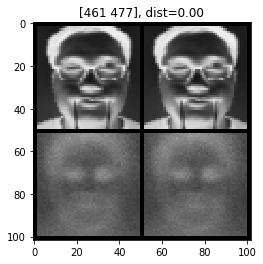

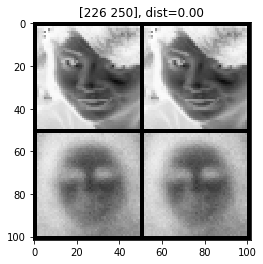

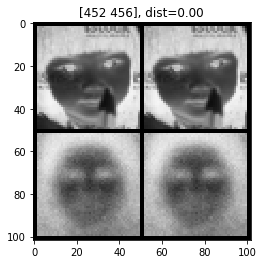

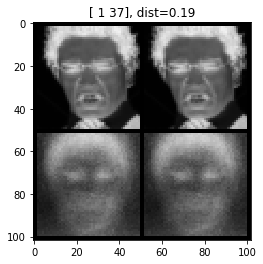

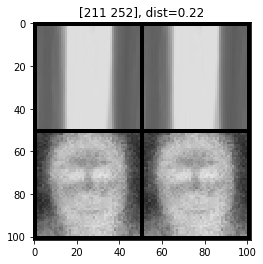

In [ ]:
data = np.load("images/data.npy")
data = data[:, np.newaxis, ...] # N x C x H x W
pairs, distances = find_duplicates(data, num_channels=1, show=True, show_train=True)

<a id='image_folder'></a>

## Image Folder

In [ ]:
# download some images
# !pip install chromedriver_installer
# !pip install google_images_download

from google_images_download import google_images_download 
response = google_images_download.googleimagesdownload()
arguments = {"keywords":"Balloons,Beaches","limit":100,"print_urls":False}
paths = response.download(arguments)


Item no.: 1 --> Item name = Balloons
Evaluating...
Starting Download...
Invalid or missing image format. Skipping...
Completed Image ====> 1.51zwIl630bL._SX425_.jpg
Completed Image ====> 2.419J7jTYX4L._SY355_.jpg
Completed Image ====> 3.untitled-untitled-IMG_7342_e1143013-eda0-4fc8-a813-a030c32bdcf3_grande.jpg
Invalid or missing image format. Skipping...
URLError on an image...trying next one... Error: <urlopen error [Errno 61] Connection refused>
Completed Image ====> 4.happy-birthday-balloons-5a9833d0aaa20.425.jpg
Invalid or missing image format. Skipping...
Completed Image ====> 5.AdobeStock_63338431.jpeg
Completed Image ====> 6.c828c45e-cae2-47d5-a044-a5a386212cd7._CR6,0,738,984_PT0_SX300__.jpg
Completed Image ====> 7.e30b5809-fe1a-47e7-bc65-82db24aee688_1.1687e4b8746664a7a765cbe8c32eec94.jpeg
Completed Image ====> 8.11169640-bright-balloons-isolated-on-white.jpg
Completed Image ====> 9.10039_1.jpg
Completed Image ====> 10.509116_1000_1_800.jpg
Completed Image ====> 11.balloons-sk

Completed Image ====> 26.http%3A%2F%2Fprod.static9.net.au%2F_%2Fmedia%2F2018%2F06%2F12%2F15%2F16%2FTop-10-most-expensive-beaches-in-the-world.jpg
Completed Image ====> 27.header-beach-2017.jpg
Completed Image ====> 28.shutterstock_517581616-870x400.jpg
Completed Image ====> 29.beaches-barcelona.jpeg
Completed Image ====> 30.Beaches_radio_beach_HiRes.jpg
Completed Image ====> 31.white-beach-boracay.jpg
Completed Image ====> 32.Beaches_radio_beach0_HiRes.jpg
Invalid or missing image format. Skipping...
Completed Image ====> 33.Florida-Secret-Beaches.jpg
Completed Image ====> 34.slideshow-1527585658.jpg
Completed Image ====> 35.78bbe374-7f07-40eb-9e4e-908b23381a3d-Oahus_Kailua_Beach_Park.jpg
Completed Image ====> 36.http%3A%2F%2Fcdn.cnn.com%2Fcnnnext%2Fdam%2Fassets%2F190523102340-10-best-beaches-united-states-restrictred.jpg
Completed Image ====> 37.shutterstock_757257655.jpg
Completed Image ====> 38.phuket-romantic-beaches.jpg
Completed Image ====> 39.gn-gift_guide_variable_c.jpg
Complet

<a id='beaches'></a>

### Find similar images (Beaches)
In a dataset without duplicates, `find_duplicates` will show the most similar images

In [ ]:
pairs, distances = find_duplicates("downloads/Beaches", num_epochs=20, z=2, show=True, show_path=True, show_train=True)

<a id='balloons'></a>
### Find duplicates (Balloons)

In [ ]:
pairs, distances = find_duplicates("downloads/balloons", num_epochs=20, z=2, show=True, show_path=True, show_train=True)

<a id='#extractor'></a>
### Find `n` closest pairs with `EmbeddingExtractor`

In [ ]:
from simages import EmbeddingExtractor

# Extract embeddings for futher analysis with `EmbeddingExtractor`
extractor = EmbeddingExtractor("downloads/balloons", num_epochs=10, z=2)

In [ ]:
# Find `n` closest pairs of images with `duplicates`
pairs, distances = extractor.duplicates(n=10)

In [ ]:
print("Pairs:\n", pairs)
print("Distances:\n", distances)

In [ ]:
# Show images for corresponding `pairs` indices
extractor.show_images([99, 108, 72, 75, 89, 92, 12, 27])